In [1]:
import pytorch_lightning as pl
import numpy as np
import torch
import os
import torchvision.transforms as t
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image

os.chdir('../')

from src.data import SimpleDataset
from src.model import AdaInModel

## Utilities

In [3]:
# Data transformations
resize_size = 0
crop_size = 64

if resize_size == 0:
    transforms = t.Compose(
        [
            t.CenterCrop(crop_size),
            t.ToTensor(),
        ]
    )
    transforms2 = t.Compose(
        [
            t.CenterCrop(50),
            t.ToTensor(),
        ]
    )
else:
    transforms = t.Compose(
        [
            t.Resize(resize_size),
            t.CenterCrop(crop_size),
            t.ToTensor(),
        ]
    )

In [4]:
def grid_visualize(imgs, titles=['Content', 'Style', 'Output']):
    n = len(imgs)
    plt.figure(figsize=(n*5, 10))

    for i, (img, title) in enumerate(zip(imgs, titles)):
        if len(img.size()) == 4:
            img = img.squeeze(0)
            
        plt.subplot(1,n,i+1)
        plt.axis('off')
        plt.title(title)
        plt.imshow(img.permute(1,2,0).numpy())

    plt.show()

# Style Transfer with Content and Style Images

In [5]:
# Select content and style images
content_dir = "../data/midog/1/"
style_dir = "../data/midog/4/"
style = {'description_width': 'initial'}
c_widget = widgets.Dropdown(description='Content Image:', options=sorted(os.listdir(content_dir)), style=style)
s_widget = widgets.Dropdown(description='Style Image:', options=sorted(os.listdir(style_dir)), style=style)

display(c_widget)
display(s_widget)

Dropdown(description='Content Image:', options=('001.tiff', '002.tiff', '003.tiff', '004.tiff', '005.tiff', '0…

Dropdown(description='Style Image:', options=('151.tiff', '152.tiff', '153.tiff', '154.tiff', '155.tiff', '156…

In [6]:
# Load images
content_path = os.path.join(content_dir, c_widget.value)
style_path = os.path.join(style_dir, s_widget.value)
content_img = transforms(Image.open(os.path.join(content_path)).convert("RGB"))
style_img = transforms(Image.open(os.path.join(style_path)).convert("RGB"))

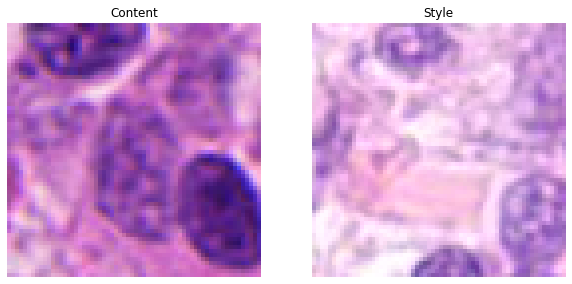

In [7]:
# Visualize images
grid_visualize([content_img, style_img])

In [8]:
# Load models
adain_checkpoint = "output/adain_vanilla/version_0/checkpoints/epoch=13049-step=78299.ckpt"
bfg_checkpoint = "output/adain_bfg/version_0/checkpoints/epoch=12799-step=76799.ckpt"
skip_checkpoint = "output/adain_skip/version_0/checkpoints/epoch=12649-step=75899.ckpt"
#adain_checkpoint = "checkpoints/vanilla.ckpt"
#bfg_checkpoint = "checkpoints/bfg.ckpt"
#skip_checkpoint = "checkpoints/skip.ckpt"

adain_model = AdaInModel().load_from_checkpoint(adain_checkpoint)
bfg_model = AdaInModel().load_from_checkpoint(bfg_checkpoint)
skip_model = AdaInModel().load_from_checkpoint(skip_checkpoint)

/home/ben/.local/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:37: UserWarning: Metric `SSIM` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


## AdaIn

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


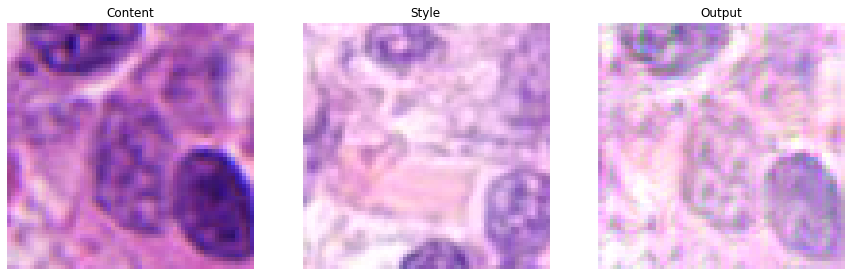

In [11]:
# Vanilla AdaIn
with torch.no_grad():
    out_vanilla, _, _ = adain_model(content_img.unsqueeze(0), style_img.unsqueeze(0))
out_vanilla = out_vanilla.detach()
grid_visualize([content_img, style_img, out_vanilla])

## AdaIn with BFG

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


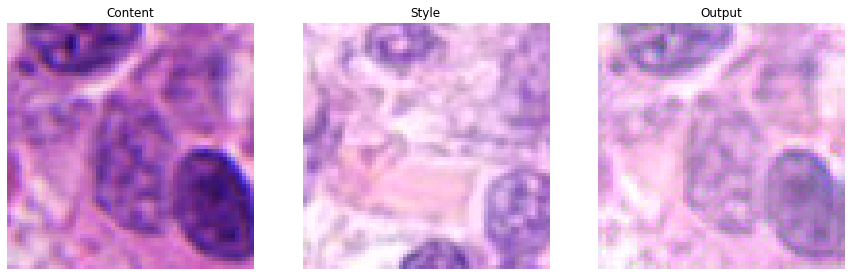

In [10]:
# AdaIn w/ BFG
with torch.no_grad():
    out_bfg, _, _ = bfg_model(content_img.unsqueeze(0), style_img.unsqueeze(0))
out_bfg = out_bfg.detach()
grid_visualize([content_img, style_img, out_bfg])

## AdaIn with BFG + Skip Connections

/home/ben/.local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


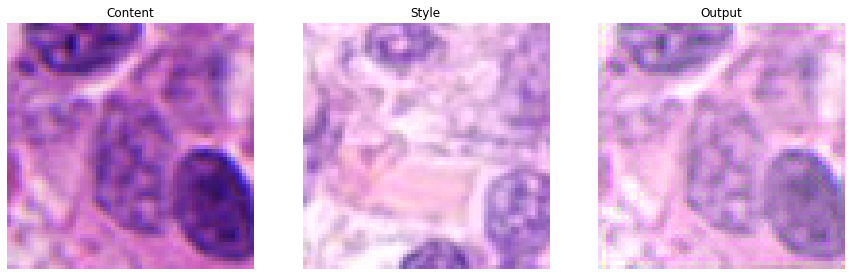

In [9]:
# AdaIn w/ BFG + Skip Connections
with torch.no_grad():
    out_skip, _, _ = skip_model(content_img.unsqueeze(0), style_img.unsqueeze(0))
out_skip = out_skip.detach()
grid_visualize([content_img, style_img, out_skip])

## Model Comparison

In [ ]:
grid_visualize([out_vanilla, out_bfg, out_skip], titles=["AdaIn", "+BFG", "+Skip"])

## Different Style Images

In [ ]:
s1_widget = widgets.Dropdown(description='Style Image 1:', options=sorted(os.listdir(style_dir)), style=style)
s2_widget = widgets.Dropdown(description='Style Image 2:', options=sorted(os.listdir(style_dir)), style=style)
s3_widget = widgets.Dropdown(description='Style Image 3:', options=sorted(os.listdir(style_dir)), style=style)

display(s1_widget)
display(s2_widget)
display(s3_widget)

In [ ]:
style_path1 = os.path.join(style_dir, s1_widget.value)
style_path2 = os.path.join(style_dir, s2_widget.value)
style_path3 = os.path.join(style_dir, s3_widget.value)

style_img1 = transforms(Image.open(os.path.join(style_path1)).convert("RGB"))
style_img2 = transforms(Image.open(os.path.join(style_path2)).convert("RGB"))
style_img3 = transforms(Image.open(os.path.join(style_path3)).convert("RGB"))

In [ ]:
grid_visualize([style_img1, style_img2, style_img3], titles=["Style 1", "Style 2", "Style 3"])

In [ ]:
with torch.no_grad():
    out_bfg1, _, _ = bfg_model(content_img.unsqueeze(0), style_img1.unsqueeze(0))
    out_bfg2, _, _ = bfg_model(content_img.unsqueeze(0), style_img2.unsqueeze(0))
    out_bfg3, _, _ = bfg_model(content_img.unsqueeze(0), style_img3.unsqueeze(0))

out_bfg1 = out_bfg1.detach()
out_bfg2 = out_bfg2.detach()
out_bfg3 = out_bfg3.detach()

grid_visualize([out_bfg1, out_bfg2, out_bfg3], titles=["Output 1", "Output 2", "Output 3"])

## Style Images from Different Scanners

In [ ]:
dir1 = "data/midog/1/"
dir2 = "data/midog/2/"
dir3 = "data/midog/3/"
dir4 = "data/midog/4/"


s1_widget = widgets.Dropdown(description='Style Scanner 1:', options=sorted(os.listdir(dir1)), style=style)
s2_widget = widgets.Dropdown(description='Style Scanner 2:', options=sorted(os.listdir(dir2)), style=style)
s3_widget = widgets.Dropdown(description='Style Scanner 3:', options=sorted(os.listdir(dir3)), style=style)
s4_widget = widgets.Dropdown(description='Style Scanner 4:', options=sorted(os.listdir(dir4)), style=style)

display(s1_widget)
display(s2_widget)
display(s3_widget)
display(s4_widget)

In [ ]:
style_path1 = os.path.join(dir1, s1_widget.value)
style_path2 = os.path.join(dir2, s2_widget.value)
style_path3 = os.path.join(dir3, s3_widget.value)
style_path4 = os.path.join(dir4, s4_widget.value)

style_img1 = transforms(Image.open(os.path.join(style_path1)).convert("RGB"))
style_img2 = transforms(Image.open(os.path.join(style_path2)).convert("RGB"))
style_img3 = transforms(Image.open(os.path.join(style_path3)).convert("RGB"))
style_img4 = transforms(Image.open(os.path.join(style_path4)).convert("RGB"))

In [ ]:
grid_visualize([style_img1, style_img2, style_img3, style_img4], 
               titles=["Scanner 1", "Scanner 2", "Scanner 3", "Scanner 4"])

In [ ]:
with torch.no_grad():
    out_bfg1, _, _ = bfg_model(content_img.unsqueeze(0), style_img1.unsqueeze(0))
    out_bfg2, _, _ = bfg_model(content_img.unsqueeze(0), style_img2.unsqueeze(0))
    out_bfg3, _, _ = bfg_model(content_img.unsqueeze(0), style_img3.unsqueeze(0))
    out_bfg4, _, _ = bfg_model(content_img.unsqueeze(0), style_img4.unsqueeze(0))
    

out_bfg1 = out_bfg1.detach()
out_bfg2 = out_bfg2.detach()
out_bfg3 = out_bfg3.detach()
out_bfg4 = out_bfg4.detach()

grid_visualize([out_bfg1, out_bfg2, out_bfg3, out_bfg4], 
               titles=["Scanner 1", "Scanner 2", "Scanner 3", "Scanner 4"])

## Content Images from Different Scanners

In [ ]:
c1_widget = widgets.Dropdown(description='Content Scanner 1:', options=sorted(os.listdir(dir1)), style=style)
c2_widget = widgets.Dropdown(description='Content Scanner 2:', options=sorted(os.listdir(dir2)), style=style)
c3_widget = widgets.Dropdown(description='Content Scanner 3:', options=sorted(os.listdir(dir3)), style=style)
c4_widget = widgets.Dropdown(description='Content Scanner 4:', options=sorted(os.listdir(dir4)), style=style)

display(c1_widget)
display(c2_widget)
display(c3_widget)
display(c4_widget)

In [ ]:
content_path1 = os.path.join(dir1, c1_widget.value)
content_path2 = os.path.join(dir2, c2_widget.value)
content_path3 = os.path.join(dir3, c3_widget.value)
content_path4 = os.path.join(dir4, c4_widget.value)

content_img1 = transforms(Image.open(os.path.join(content_path1)).convert("RGB"))
content_img2 = transforms(Image.open(os.path.join(content_path2)).convert("RGB"))
content_img3 = transforms(Image.open(os.path.join(content_path3)).convert("RGB"))
content_img4 = transforms(Image.open(os.path.join(content_path4)).convert("RGB"))

In [ ]:
grid_visualize([content_img1, content_img2, content_img3, content_img4], 
               titles=["Scanner 1", "Scanner 2", "Scanner 3", "Scanner 4"])

In [ ]:
with torch.no_grad():
    out_bfg1, _, _ = bfg_model(content_img1.unsqueeze(0), style_img.unsqueeze(0))
    out_bfg2, _, _ = bfg_model(content_img2.unsqueeze(0), style_img.unsqueeze(0))
    out_bfg3, _, _ = bfg_model(content_img3.unsqueeze(0), style_img.unsqueeze(0))
    out_bfg4, _, _ = bfg_model(content_img4.unsqueeze(0), style_img.unsqueeze(0))
    

out_bfg1 = out_bfg1.detach()
out_bfg2 = out_bfg2.detach()
out_bfg3 = out_bfg3.detach()
out_bfg4 = out_bfg4.detach()

grid_visualize([out_bfg1, out_bfg2, out_bfg3, out_bfg4], 
               titles=["Scanner 1", "Scanner 2", "Scanner 3", "Scanner 4"])

## Same Content and Style Image

In [ ]:
with torch.no_grad():
    out_bfg, _, _ = bfg_model(style_img.unsqueeze(0), style_img.unsqueeze(0))
    
out_bfg = out_bfg.detach()

grid_visualize([style_img, out_bfg], titles=["Original", "Output"])

## Using Predefined Style Features

In [ ]:
#avg_feats = torch.load("data/scanner4_features.pt")
avg_feats = torch.load("checkpoints/scanner4_features.pt")


with torch.no_grad():
    out, _, _ = bfg_model(content_img.unsqueeze(0), style_img.unsqueeze(0))
    out_avg, _, _ = bfg_model.net(content_img.unsqueeze(0), f_s=avg_feats)
    
out = out.detach()
out_avg = out_avg.detach()

grid_visualize([content_img, style_img, out, out_avg], titles=["Content", "Style", "Output", "Avg Features"])

In [ ]:
const_feats = []
for f in avg_feats:
    const_feats.append(torch.zeros_like(f).squeeze(0))

with torch.no_grad():
    out_ones, _, _ = bfg_model.net(content_img.unsqueeze(0), f_s=const_feats)
    
out_ones = out_ones.detach()

grid_visualize([content_img, style_img, out, out_ones], titles=["Content", "Style", "Output", "Constant Features"])

In [ ]:
rand_feats = []
for f in avg_feats:
    rand_feats.append((torch.rand_like(f)*2-1).squeeze(0))

with torch.no_grad():
    out_rand, _, _ = bfg_model.net(content_img.unsqueeze(0), f_s=rand_feats)
    
out_ones = out_ones.detach()

grid_visualize([content_img, style_img, out, out_rand], titles=["Content", "Style", "Output", "Random Features"])